# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.136077e+01     1.412176e+01
 * time: 0.004708051681518555
     1     6.348199e+01     8.565495e+00
 * time: 0.01254892349243164
     2     5.759758e+01     1.231513e+01
 * time: 0.030005931854248047
     3     4.057366e+01     8.240987e+00
 * time: 0.05438494682312012
     4     2.863386e+01     7.304283e+00
 * time: 0.2899971008300781
     5     1.802528e+01     3.683822e+00
 * time: 0.31126904487609863
     6     1.148621e+01     2.764211e+00
 * time: 0.32890796661376953
     7     1.070214e+01     6.496663e+00
 * time: 0.3430619239807129
     8     9.255628e+00     3.888243e+00
 * time: 0.36049795150756836
     9     7.919134e+00     2.012692e+00
 * time: 0.37783193588256836
    10     7.400808e+00     3.128029e+00
 * time: 0.39247798919677734
    11     6.790857e+00     1.962441e+00
 * time: 0.41538310050964355
    12     6.401458e+00     1.982990e+00
 * time: 0.44263410568237305
    13     6.180558e+00     2.156964e+00
 * time:

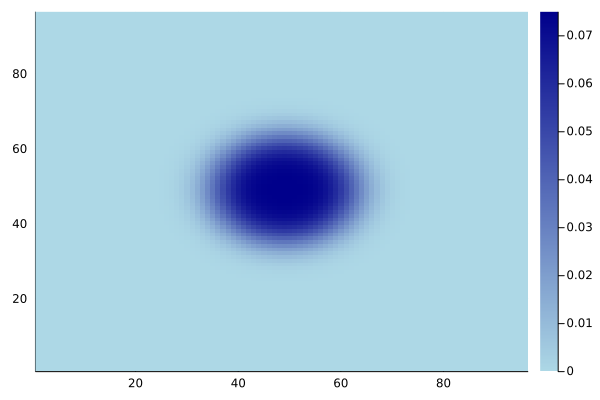

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))